In [1]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install sklearn
%pip install xgboost
%pip install gensim
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from sklearn.manifold import TSNE
import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))

# ref: https://www.kaggle.com/code/eswarbabu88/toxic-comment-glove-logistic-regression
# need to use glove_model from above
# Download required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path_ds = r"E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Dataset\final_dataset_v1_afternb1.csv"

df_ds = pd.read_csv(path_ds)

# split train and set dataset 
df_train, df_test = train_test_split(df_ds, test_size=0.2, random_state=42)

df_train.head()

,text,label,source,word_length,text_no_sw
70396,"as a citizen of the united states, i have the ...",0,competition-essay,569,"citizen united states , right poinion electora..."
37844,"dear hiring manager,i am writing to express m...",1,mistral7binstruct_v2,226,"dear hiring manager , writing express interest..."
24861,working in groups can be a valuable experience...,1,llammistral7binstruct,382,working groups valuable experience students . ...
47197,the using of cars has caused much of the world...,0,personal-sunilthite,444,using cars caused much worlds green house gas ...
20172,to teacher_namewe the students should have a r...,0,persuade_corpus,263,teacher_name students right play sport want c ...


In [4]:
print("Test size", df_test.shape)
print("Train size", df_train.shape)

Test size (14211, 5)
Train size (56843, 5)


In [5]:
df = pd.concat([df_test['text_no_sw'], df_train['text_no_sw']], axis=0)

vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
X = vectorizer.fit_transform(df)

In [6]:
print(X)

  (0, 21571)	0.10898048360373974
  (0, 9180)	0.09693121418652438
  (0, 47615)	0.09809744187043064
  (0, 33395)	0.12424351059594203
  (0, 26354)	0.17482850594701665
  (0, 23600)	0.1509289677205448
  (0, 21879)	0.15083487572605075
  (0, 14440)	0.08093061133235767
  (0, 49354)	0.07503213706882006
  (0, 21095)	0.06619845785459015
  (0, 31581)	0.06580317157607467
  (0, 23264)	0.059674836118149596
  (0, 12655)	0.28474063962006513
  (0, 38304)	0.08947815186671501
  (0, 1678)	0.077696327167418
  (0, 35353)	0.07112764270123274
  (0, 24354)	0.07157308282190991
  (0, 42477)	0.04635532333618818
  (0, 5317)	0.06143644791038137
  (0, 14289)	0.08292295626546661
  (0, 14261)	0.06261121553680823
  (0, 499)	0.09466926257413381
  (0, 6857)	0.06785644802466825
  (0, 22852)	0.20353708923252262
  (0, 18504)	0.1981488815729723
  :	:
  (71053, 6749)	0.07624119777073952
  (71053, 19582)	0.11092428499820947
  (71053, 21730)	0.07054608959771119
  (71053, 3485)	0.16132119525011226
  (71053, 39479)	0.0823288294827

In [ ]:
# How to use
# ----------

# .. sourcecode:: pycon

#     >>> from gensim.test.utils import datapath, get_tmpfile
#     >>> from gensim.models import KeyedVectors
#     >>> from gensim.scripts.glove2word2vec import glove2word2vec
#     >>>
#     >>> glove_file = datapath('test_glove.txt')
#     >>> tmp_file = get_tmpfile("test_word2vec.txt")
#     >>>
#     >>> _ = glove2word2vec(glove_file, tmp_file)
#     >>>
#     >>> model = KeyedVectors.load_word2vec_format(tmp_file)

# Command line arguments
# ----------------------

In [7]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# from gensim.models import KeyedVectors
# from gensim.test.utils import datapath, get_tmpfile

# Use raw strings or escape the backslashes in file paths
Glove_path = datapath(r"E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Code\detect_llm_generated_essay-main\notebooks\Data_baseline\Data Glove\glove.6B.300d.txt")
word2vec_output_file = get_tmpfile(r"E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Dataset\output_w2v.txt")

# Convert GloVe format to Word2Vec format
# glove2word2vec(Glove_path, word2vec_output_file)

# Load the Stanford GloVe model in Word2Vec format
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Now you can use the glove_model for further processing

In [8]:
print("Glove Word Embeddings of word 'human' ")
glove_model['human']

Glove Word Embeddings of word 'human' 


array([ 1.6608e-01,  3.1670e-01, -5.8249e-01, -3.0978e-01, -4.3342e-02,
       -2.7902e-01, -2.2359e-01,  1.5822e-01,  1.4204e-01, -2.5546e+00,
        1.4570e-01, -2.4335e-01, -7.9048e-01, -7.0345e-02,  3.6125e-02,
        8.6590e-02,  7.9128e-01,  8.8366e-01, -3.8760e-01, -2.5363e-01,
       -2.1893e-01,  2.9416e-01, -1.0171e-01,  1.3125e-01,  1.7897e-01,
        5.8697e-01,  9.8880e-01,  1.3927e-01,  4.0796e-01,  1.0456e-02,
        8.6774e-03,  5.1483e-01, -1.1121e+00, -5.1464e-01,  9.6359e-02,
        1.8087e-01,  3.3565e-01,  2.4491e-01, -2.3970e-01, -3.6623e-01,
        5.1139e-01,  2.0225e-01, -9.9939e-02, -2.1025e-01, -4.4924e-01,
        2.7756e-01, -4.3422e-01,  2.9502e-01,  3.0119e-01,  7.0748e-02,
       -4.7604e-02,  5.4410e-01, -2.1035e-01,  9.3486e-02, -1.6013e-01,
       -6.2257e-02,  1.9005e-01, -4.4857e-01, -1.6407e-01, -2.2538e-01,
        1.6229e-01,  2.2353e-01,  1.4428e-01, -1.4320e-01, -5.4452e-01,
       -1.5810e-01,  1.6613e-01,  3.0517e-01,  2.2682e-01,  2.33

t-distributed stochastic neighbor embedding

In [9]:
def plot_tsne(model, num):
    labels = []
    tokens = []
    for word in model.key_to_index:
        if word not in stop_words:
            tokens.append(np.array(model[word]))
            labels.append(word)
    tsne = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 2500, random_state = 23)
    data = tsne.fit_transform(np.array(tokens[:num]))
    x = []
    y = []
    for each in data:
        x.append(each[0])
        y.append(each[1])
    plt.figure(figsize = (10, 10))
    for i in range(num):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    plt.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


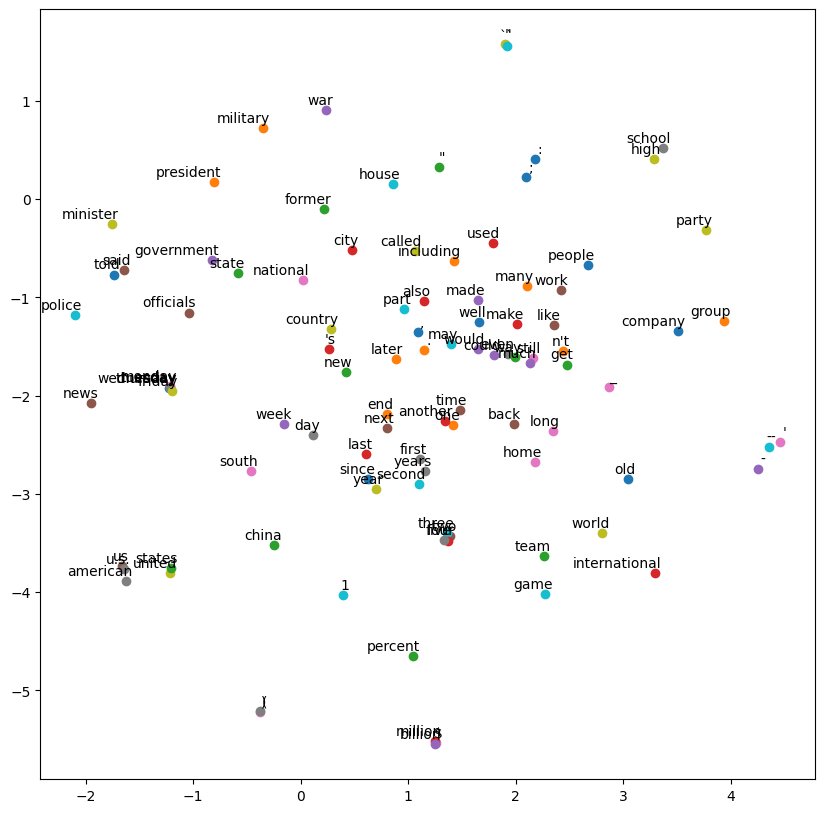

In [10]:
# visualising the cbow archtecture(only the first 300)
plot_tsne(glove_model, 100)

In [11]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Assuming glove_model is already loaded in your environment
# Function to convert a sentence to a vector
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)  # This requires the 'punkt' tokenizer
    words = [w for w in words if w not in stop_words]
    words = [w for w in words if w.isalpha()]  # Filter out non-alphabetic tokens
    M = []
    for w in words:
        try:
            M.append(glove_model[w])  # Lookup word in GloVe model
        except KeyError:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)  # Return a zero vector if no word embeddings are found
    return v / np.sqrt((v ** 2).sum())  # Normalize the vector


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71054 entries, 0 to 71053
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         71054 non-null  object
 1   label        71054 non-null  int64 
 2   source       71054 non-null  object
 3   word_length  71054 non-null  int64 
 4   text_no_sw   71054 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [13]:
df = pd.concat([df_test['text_no_sw'], df_train['text_no_sw']], axis=0)
X = vectorizer.fit_transform(df)

In [29]:
# # Apply sent2vec to each sentence
# # X = np.array([sent2vec(sent) for sent in sentences])

# # Check if the lengths match
# if len(X) == len(sentences):
#     print(f"The number of elements in X ({len(X)}) matches the number of sentences ({len(sentences)}).")
# else:
#     print(f"Mismatch: X has {len(X)} elements, while there are {len(sentences)} sentences.")


The number of elements in X (1336733) matches the number of sentences (1336733).


Logistic Regression

In [46]:
X

<72183x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 7149191 stored elements in Compressed Sparse Row format>

In [14]:
print(X[:df_train.shape[0]].shape)  # Features
print(df_train['label'].shape)      # Labels

(56843, 50000)
(56843,)


In [15]:
# lr_model = LogisticRegression()
# cv = StratifiedKFold(n_splits=5, shuffle=True)
# auc_scores = []

# # Split the data into training and validation for each fold
# for train_idx, val_idx in cv.split(X[:df_train.shape[0]], df_train['label']):
#     X_train, X_val = X[:df_train.shape[0]][train_idx], X[:df_train.shape[0]][val_idx]
#     y_train, y_val = df_train['label'].iloc[train_idx], df_train['label'].iloc[val_idx]

#     # Train the model on the training data
#     lr_model.fit(X_train, y_train)
    
#     # Predict probabilities for the positive class on the validation data
#     preds_val_lr = lr_model.predict_proba(X_val)[:, 1]
    
#     # Calculate ROC AUC score for the validation set
#     auc_score = roc_auc_score(y_val, preds_val_lr)
#     auc_scores.append(auc_score)

# # Print the scores for each fold
# for i, score in enumerate(auc_scores, 1):
#     print(f'ROC AUC for fold {i}: {score:.4f}')

# print('Average ROC AUC:', round(sum(auc_scores)/len(auc_scores), 4))
# print('Standard deviation:', round((sum([(x - sum(auc_scores)/len(auc_scores))**2 for x in auc_scores])/len(auc_scores))**0.5, 4))

ROC AUC for fold 1: 0.4912
ROC AUC for fold 2: 0.4952
ROC AUC for fold 3: 0.4941
ROC AUC for fold 4: 0.5019
ROC AUC for fold 5: 0.4976
Average ROC AUC: 0.496
Standard deviation: 0.0036


Here is the code that directly use Logistic Regression

In [ ]:
# import numpy as np
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df_train and df_test are already defined, and you are concatenating the text_no_sw columns
# # df = pd.concat([df_test['text_no_sw'], df_train['text_no_sw']], axis=0)

# # Vectorize the concatenated dataframe
# # X = vectorizer.fit_transform(df)  # 'vectorizer' is assumed to be defined elsewhere

# # Define train and test indices
# train_size = df_train.shape[0]  # Size of training set
# test_size = df_test.shape[0]    # Size of test set

# # Create labels (y_train and y_test are assumed to be in df_train and df_test)
# y_train = df_train['label']
# y_test = df_test['label']

# # Model definition (SGDClassifier allows for tracking of loss during training)
# lr_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, verbose=1, learning_rate='constant', eta0=0.01)  # verbose=1 for loss tracking

# # Cross-validation setup
# cv = StratifiedKFold(n_splits=5, shuffle=True)
# auc_scores = []
# training_losses = []  # To store losses for each fold

# # Perform cross-validation on training data only
# for fold, (train_idx, val_idx) in enumerate(cv.split(X[:train_size], y_train), 1):
#     X_train, X_val = X[:train_size][train_idx], X[:train_size][val_idx]
#     y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

#     # Reset model before each fold
#     lr_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
    
#     fold_losses = []  # Store training losses for the current fold

#     # Track loss for 10 epochs
#     for epoch in range(10):  # example for 10 epochs
#         lr_model.partial_fit(X_train, y_train_cv, classes=np.unique(y_train))
        
#         # For simplicity, using the loss calculated directly after fitting
#         y_pred_train = lr_model.predict_proba(X_train)[:, 1]  # Predict probabilities
#         log_loss = -np.mean(y_train_cv * np.log(y_pred_train) + (1 - y_train_cv) * np.log(1 - y_pred_train))  # Log-loss formula
#         fold_losses.append(log_loss)

#         # print(f"Fold {fold}, Epoch {epoch + 1}, Training loss: {log_loss:.4f}")
    
#     # Append fold's losses to the overall loss tracking list
#     training_losses.append(fold_losses)

#     # Predict probabilities for the positive class on the validation data
#     preds_val_lr = lr_model.predict_proba(X_val)[:, 1]
    
#     # Calculate ROC AUC score for the validation set
#     auc_score = roc_auc_score(y_val_cv, preds_val_lr)
#     auc_scores.append(auc_score)

# # Print AUC scores for each fold
# for i, score in enumerate(auc_scores, 1):
#     print(f'ROC AUC for fold {i}: {score:.4f}')

# # Average ROC AUC and standard deviation
# print('Average ROC AUC:', round(sum(auc_scores)/len(auc_scores), 4))
# print('Standard deviation:', round((sum([(x - sum(auc_scores)/len(auc_scores))**2 for x in auc_scores])/len(auc_scores))**0.5, 4))

# # Skip final fitting and prediction on test dataset if not needed
# # However, if you're looking for performance metrics on the test set, fitting the model on full training data is essential.
# # Train the model on the entire training dataset
# lr_model.fit(X[:train_size], y_train)

# # Predict probabilities on the test dataset
# preds_test_lr = lr_model.predict_proba(X[train_size:])[:, 1]

# # Calculate ROC AUC for the test dataset
# auc_score_test = roc_auc_score(y_test, preds_test_lr)
# print(f'Test ROC AUC: {auc_score_test:.4f}')

# # Plotting the training loss for each fold
# plt.figure(figsize=(10, 6))
# for fold, losses in enumerate(training_losses, 1):
#     plt.plot(range(1, 11), losses, label=f'Fold {fold}')  # 10 epochs

# plt.title('Training Loss per Epoch for Each Fold')
# plt.xlabel('Epoch')
# plt.ylabel('Log Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

Simulate training the model on the whole dataset, not using cross validation

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

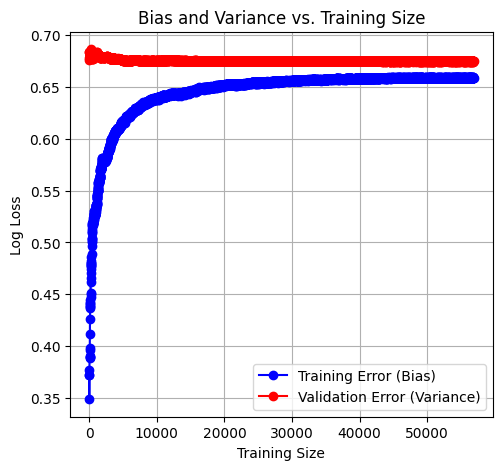

In [24]:
# Assuming df_train and df_test are already defined, and you are concatenating the text_no_sw columns
# df = pd.concat([df_test['text_no_sw'], df_train['text_no_sw']], axis=0)

# Vectorize the concatenated dataframe
# X = vectorizer.fit_transform(df)  # 'vectorizer' is assumed to be defined elsewhere

# Define train and test indices
train_size = df_train.shape[0]  # Size of training set
test_size = df_test.shape[0]    # Size of test set

# Create labels (y_train and y_test are assumed to be in df_train and df_test)
y_train = df_train['label']
y_test = df_test['label']

# Model definition
lr_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)

# Prepare to calculate bias and variance
train_errors = []
val_errors = []
sizes = range(1, train_size + 1, 10)  # Vary the training size in increments

# Split the training data for cross-validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X[:train_size], y_train, test_size=0.2, random_state=42)

for size in sizes:
    # Fit the model only if both classes are present in the training subset
    if len(np.unique(y_train_split[:size])) > 1:
        # Fit the model on the current training size
        lr_model.fit(X_train_split[:size], y_train_split[:size])
        
        # Calculate training error
        train_pred = lr_model.predict_proba(X_train_split[:size])[:, 1]
        train_log_loss = -np.mean(y_train_split[:size] * np.log(train_pred) + (1 - y_train_split[:size]) * np.log(1 - train_pred))
        train_errors.append(train_log_loss)
        
        # Calculate validation error
        val_pred = lr_model.predict_proba(X_val_split)[:, 1]
        val_log_loss = -np.mean(y_val_split * np.log(val_pred) + (1 - y_val_split) * np.log(1 - val_pred))
        val_errors.append(val_log_loss)
    else:
        # If only one class is present, append NaN to the errors
        train_errors.append(np.nan)
        val_errors.append(np.nan)

# Plotting Bias and Variance
plt.figure(figsize=(12, 5))

# Bias and Variance Plot
plt.subplot(1, 2, 1)
valid_sizes = [size for size, train_err, val_err in zip(sizes, train_errors, val_errors) if not np.isnan(train_err) and not np.isnan(val_err)]
train_errors_valid = [train_err for train_err in train_errors if not np.isnan(train_err)]
val_errors_valid = [val_err for val_err in val_errors if not np.isnan(val_err)]
plt.plot(valid_sizes, train_errors_valid, marker='o', color='b', label='Training Error (Bias)')
plt.plot(valid_sizes, val_errors_valid, marker='o', color='r', label='Validation Error (Variance)')
plt.title('Bias and Variance vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)

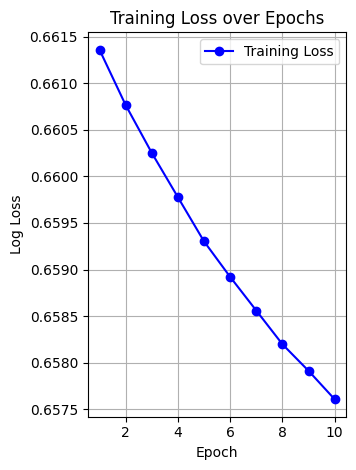

In [25]:
# Training Loss Over Epochs
training_losses = []  # Store the log loss for each epoch
epochs = 10  # Number of epochs to simulate

for epoch in range(epochs):
    lr_model.partial_fit(X[:train_size], y_train, classes=np.unique(y_train))  # Fit model incrementally
    
    # Predict probabilities for the training set
    y_pred_train = lr_model.predict_proba(X[:train_size])[:, 1]
    
    # Calculate log loss for the current epoch
    log_loss = -np.mean(y_train * np.log(y_pred_train) + (1 - y_train) * np.log(1 - y_pred_train))
    training_losses.append(log_loss)  # Append the log loss for each epoch

# Plotting Training Loss over Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_losses, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Below is XGBoost

In [16]:
xgb_model = XGBClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True)
auc_scores = []

# Split the data into training and validation for each fold
for train_idx, val_idx in cv.split(X[:df_train.shape[0]], df_train['label']):
    X_train, X_val = X[:df_train.shape[0]][train_idx], X[:df_train.shape[0]][val_idx]
    y_train, y_val = df_train['label'].iloc[train_idx], df_train['label'].iloc[val_idx]

    # Train the model on the training data
    xgb_model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class on the validation data
    preds_val_xgb = xgb_model.predict_proba(X_val)[:, 1]
    
    # Calculate ROC AUC score for the validation set
    auc_score = roc_auc_score(y_val, preds_val_xgb)
    auc_scores.append(auc_score)

# Print the scores for each fold
for i, score in enumerate(auc_scores, 1):
    print(f'ROC AUC for fold {i}: {score:.4f}')

print('Average ROC AUC:', round(sum(auc_scores)/len(auc_scores), 4))
print('Standard deviation:', round((sum([(x - sum(auc_scores)/len(auc_scores))**2 for x in auc_scores])/len(auc_scores))**0.5, 4))

ROC AUC for fold 1: 0.4988
ROC AUC for fold 2: 0.5063
ROC AUC for fold 3: 0.4995
ROC AUC for fold 4: 0.4911
ROC AUC for fold 5: 0.5061
Average ROC AUC: 0.5004
Standard deviation: 0.0056
